In [25]:
try:
  # This command only in Colab.
  #%tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

IndentationError: ignored

In [12]:
# Get project files
#!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

#!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [13]:
# 3
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255)
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255)

train_data_gen = train_image_generator.flow_from_directory(directory = train_dir,
                                                           batch_size = batch_size,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = "binary")
val_data_gen = validation_image_generator.flow_from_directory(directory = validation_dir,
                                                              batch_size = batch_size,
                                                              target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode = "binary")
test_data_gen = test_image_generator.flow_from_directory(directory = PATH,
                                                         batch_size = batch_size,
                                                         target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                         shuffle = False,
                                                         classes=['test'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


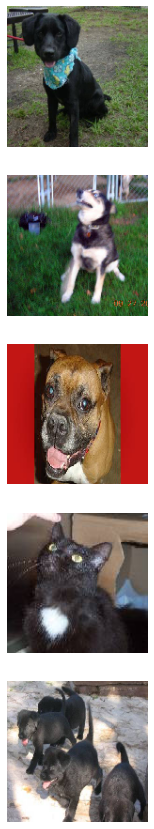

In [16]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [17]:
# 5
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255,
                                                                        rotation_range=40,
                                                                        zoom_range=0.25,
                                                                        width_shift_range=0.25,
                                                                        height_shift_range=0.25,
                                                                        horizontal_flip=True,
                                                                        fill_mode='nearest')


Found 2000 images belonging to 2 classes.


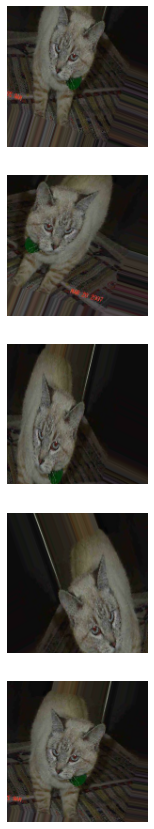

In [18]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [19]:
# 7
model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

In [21]:
# 8
history = model.fit(x=train_data_gen, steps_per_epoch=10, epochs=epochs, 
                    validation_data=val_data_gen, validation_steps=6)


Epoch 1/15
10/10 [==============================] - 67s 7s/step - loss: 0.7113 - accuracy: 0.4968 - val_loss: 0.6884 - val_accuracy: 0.4909
Epoch 2/15
10/10 [==============================] - 65s 6s/step - loss: 0.6912 - accuracy: 0.5065 - val_loss: 0.6910 - val_accuracy: 0.5182
Epoch 3/15
10/10 [==============================] - 69s 7s/step - loss: 0.6929 - accuracy: 0.4935 - val_loss: 0.6926 - val_accuracy: 0.4922
Epoch 4/15
10/10 [==============================] - 67s 7s/step - loss: 0.6917 - accuracy: 0.5141 - val_loss: 0.6899 - val_accuracy: 0.5443
Epoch 5/15
10/10 [==============================] - 65s 6s/step - loss: 0.6903 - accuracy: 0.5268 - val_loss: 0.6924 - val_accuracy: 0.5052
Epoch 6/15
10/10 [==============================] - 66s 7s/step - loss: 0.6936 - accuracy: 0.5179 - val_loss: 0.6928 - val_accuracy: 0.5013
Epoch 7/15
10/10 [==============================] - 65s 6s/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 8/15
10/10 [==

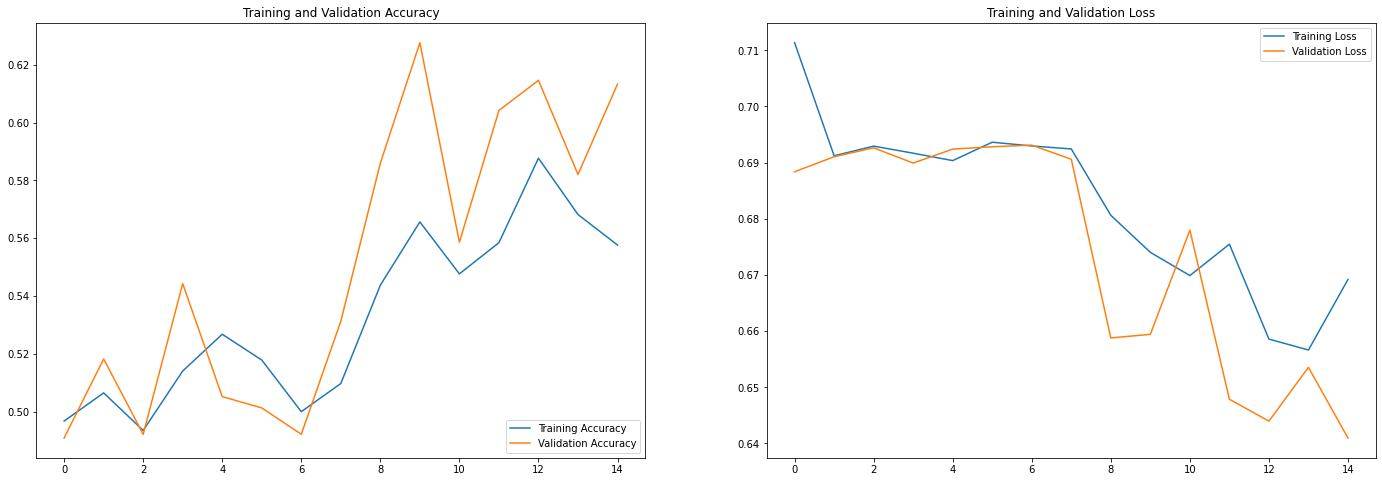

In [22]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 [==============================] - 2s 2s/step


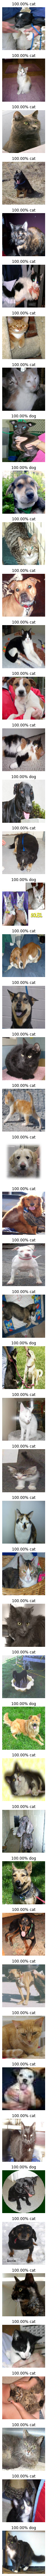

In [23]:
test_images, _ = next(test_data_gen)
probabilities = (model.predict(test_data_gen) > 0.5).astype("int32")
plotImages(test_images, probabilities=probabilities)



In [24]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability[0]) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Your model correctly identified 0.62% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
